<a href="https://colab.research.google.com/github/BugYale/Data_Science_IMA/blob/main/IMA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
from google.colab import files
upload = files.upload()

Saving real_final_dataset_without_rescaling.csv to real_final_dataset_without_rescaling (1).csv


In [118]:
import numpy as np
import pandas as pd 
import math
import random
# from sklearn.model_selection import StratifiedKFold
# import matplotlib.pyplot as plt 
# import seaborn as sns 
 
%matplotlib inline

In [119]:
dataset = pd.read_csv('real_final_dataset_without_rescaling.csv')
dataset

,Unnamed: 0,review_score,price,freight_value,payment_value,is_repeat_buyer,product_photos_qty,is_same_region,dispatch_time,deliver_time,estimate_time_diff,delivery_is_late,freight_ratio
0,0,5,58.90,13.29,72.19,0,4.0,0,6.399468,1.214954,8.011250,0,0.225637
1,1,4,239.90,19.93,259.83,1,2.0,1,8.154097,8.062083,2.330278,0,0.083076
2,2,5,199.00,17.87,216.87,0,2.0,1,1.918947,6.029491,13.444954,0,0.089799
3,3,4,12.99,12.79,25.78,0,1.0,1,2.144039,4.003229,5.435660,0,0.984604
4,4,5,199.90,18.14,218.04,0,1.0,0,11.825208,13.289144,15.303808,0,0.090745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102750,107249,5,299.99,43.41,343.40,0,3.0,0,1.924931,15.449769,7.043981,0,0.144705
102751,107250,5,350.00,36.53,386.53,0,1.0,0,2.901551,6.518692,8.144502,0,0.104371
102752,107251,5,99.90,16.95,116.85,0,1.0,0,2.920347,1.881343,12.484468,0,0.169670
102753,107252,5,55.99,8.72,64.71,0,1.0,1,0.833264,1.122766,8.083565,0,0.155742


In [ ]:
dataset.isnull().sum()

In [121]:
del dataset['Unnamed: 0']
dataset

,review_score,price,freight_value,payment_value,is_repeat_buyer,product_photos_qty,is_same_region,dispatch_time,deliver_time,estimate_time_diff,delivery_is_late,freight_ratio
0,5,58.90,13.29,72.19,0,4.0,0,6.399468,1.214954,8.011250,0,0.225637
1,4,239.90,19.93,259.83,1,2.0,1,8.154097,8.062083,2.330278,0,0.083076
2,5,199.00,17.87,216.87,0,2.0,1,1.918947,6.029491,13.444954,0,0.089799
3,4,12.99,12.79,25.78,0,1.0,1,2.144039,4.003229,5.435660,0,0.984604
4,5,199.90,18.14,218.04,0,1.0,0,11.825208,13.289144,15.303808,0,0.090745
...,...,...,...,...,...,...,...,...,...,...,...,...
102750,5,299.99,43.41,343.40,0,3.0,0,1.924931,15.449769,7.043981,0,0.144705
102751,5,350.00,36.53,386.53,0,1.0,0,2.901551,6.518692,8.144502,0,0.104371
102752,5,99.90,16.95,116.85,0,1.0,0,2.920347,1.881343,12.484468,0,0.169670
102753,5,55.99,8.72,64.71,0,1.0,1,0.833264,1.122766,8.083565,0,0.155742


In [122]:
k = dataset.pop("review_score")
k

0         5
1         4
2         5
3         4
4         5
         ..
102750    5
102751    5
102752    5
102753    5
102754    5
Name: review_score, Length: 102755, dtype: int64

In [123]:
for i in range(len(k)):
  if k[i] <= 3:
    k[i] = 0
  else:
    k[i] = 1
k

<ipython-input-123-550113db1569>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k[i] = 1
<ipython-input-123-550113db1569>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k[i] = 0


0         1
1         1
2         1
3         1
4         1
         ..
102750    1
102751    1
102752    1
102753    1
102754    1
Name: review_score, Length: 102755, dtype: int64

In [124]:
dataset.insert(dataset.shape[1],"review_score",k)
dataset

,price,freight_value,payment_value,is_repeat_buyer,product_photos_qty,is_same_region,dispatch_time,deliver_time,estimate_time_diff,delivery_is_late,freight_ratio,review_score
0,58.90,13.29,72.19,0,4.0,0,6.399468,1.214954,8.011250,0,0.225637,1
1,239.90,19.93,259.83,1,2.0,1,8.154097,8.062083,2.330278,0,0.083076,1
2,199.00,17.87,216.87,0,2.0,1,1.918947,6.029491,13.444954,0,0.089799,1
3,12.99,12.79,25.78,0,1.0,1,2.144039,4.003229,5.435660,0,0.984604,1
4,199.90,18.14,218.04,0,1.0,0,11.825208,13.289144,15.303808,0,0.090745,1
...,...,...,...,...,...,...,...,...,...,...,...,...
102750,299.99,43.41,343.40,0,3.0,0,1.924931,15.449769,7.043981,0,0.144705,1
102751,350.00,36.53,386.53,0,1.0,0,2.901551,6.518692,8.144502,0,0.104371,1
102752,99.90,16.95,116.85,0,1.0,0,2.920347,1.881343,12.484468,0,0.169670,1
102753,55.99,8.72,64.71,0,1.0,1,0.833264,1.122766,8.083565,0,0.155742,1


In [125]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102755 entries, 0 to 102754
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   price               102755 non-null  float64
 1   freight_value       102755 non-null  float64
 2   payment_value       102755 non-null  float64
 3   is_repeat_buyer     102755 non-null  int64  
 4   product_photos_qty  102755 non-null  float64
 5   is_same_region      102755 non-null  int64  
 6   dispatch_time       102755 non-null  float64
 7   deliver_time        102755 non-null  float64
 8   estimate_time_diff  102755 non-null  float64
 9   delivery_is_late    102755 non-null  int64  
 10  freight_ratio       102755 non-null  float64
 11  review_score        102755 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 9.4 MB


In [126]:
# 对整体样本进行抽样（避免计算量过大

dataset = np.array(dataset).tolist()

ratio = 0.03
sample_size = int(len(dataset)*ratio)
random.shuffle(dataset)
data_set = dataset[:sample_size]
len(data_set)

3082

In [127]:
# 划分训练集和测试集
# dataset = np.array(dataset)
# X = dataset[:,1:]
# Y = dataset[:,0]
# X.shape

def splitData(data_set,ratio):
    train_size = int(len(data_set)*ratio)
    random.shuffle(data_set)
    train_set = data_set[:train_size]
    test_set = data_set[train_size:]
    return train_set,test_set

In [128]:
trainset,testset = splitData(data_set,ratio = 0.7)
print('Split {0} samples into {1} train and {2} test samples '.format(len(data_set), len(trainset), len(testset)))

Split 3082 samples into 2157 train and 925 test samples 


In [129]:
#提取数据特征
# 1 按类别划分数据，返回值为划分好的数据+每种类别的数量
def seprateByClass(dataset):
    seprate_dict = {}
    info_dict = {}
    for vector in dataset:
        if vector[-1] not in seprate_dict:
            seprate_dict[vector[-1]] = []
            info_dict[vector[-1]] = 0
        seprate_dict[vector[-1]].append(vector)
        info_dict[vector[-1]] +=1
    return seprate_dict,info_dict


In [130]:
train_separated,train_info = seprateByClass(trainset)
train_info

{1.0: 1642, 0.0: 515}

In [131]:
#计算均值和方差
def mean(list):
    list = [float(x) for x in list] #字符串转数字
    return sum(list)/float(len(list))
def var(list):
    list = [float(x) for x in list]
    avg = mean(list)
    var = sum([math.pow((x-avg),2) for x in list])/float(len(list)-1)
    return var

In [132]:
def summarizeAttribute(dataset):
    dataset = np.delete(dataset,-1,axis = 1) # delete label
    summaries = [(mean(attr),var(attr)) for attr in zip(*dataset)]
    return summaries

In [133]:
summary = summarizeAttribute(trainset)
summary

[(127.09787668057282, 42242.61197146341),
 (20.005572554473787, 231.2647090992097),
 (173.78763560500698, 48171.31331685603),
 (0.0727862772369031, 0.06751973769656978),
 (2.1933240611961056, 2.733944279444123),
 (0.35465924895688455, 0.22898222381631197),
 (3.2917935629475084, 11.420869055558754),
 (9.256551317630802, 64.96416825043282),
 (11.161923260186448, 87.18328104827255),
 (0.08623087621696801, 0.078831659101876),
 (0.31499119606282067, 0.13374054308724617)]

In [134]:
#按类别提取属性特征

def summarizeByClass(dataset):
    dataset_separated,dataset_info = seprateByClass(dataset)
    summarize_by_class = {}
    for classValue, vector in dataset_separated.items():
        summarize_by_class[classValue] = summarizeAttribute(vector)
    return summarize_by_class

In [135]:
train_Summary_by_class = summarizeByClass(trainset)
train_Summary_by_class

{1.0: [(126.81140682094828, 36825.50653628895),
  (19.78961632155902, 210.31194470340128),
  (168.48434835566377, 47959.22396730819),
  (0.06760048721071864, 0.06306907124900293),
  (2.210109622411693, 2.7327923097306583),
  (0.35809987819732036, 0.2300044312126654),
  (3.057237306581854, 9.049468407398754),
  (8.121597060100605, 34.94145118283734),
  (12.340421135584403, 57.213706096151256),
  (0.04080389768574909, 0.03916279028339777),
  (0.3074149137815833, 0.09816198825351351)],
 0.0: [(128.01124271844685, 59618.38677316079),
  (20.694116504854378, 297.9845830214197),
  (190.6963689320388, 48565.841940680744),
  (0.08932038834951456, 0.08150050999206661),
  (2.1398058252427186, 2.7391711684485043),
  (0.34368932038834954, 0.2260058176872788),
  (4.039640889068682, 18.277921717297602),
  (12.875182173678525, 143.70635880533723),
  (7.404460131247756, 164.4511986853292),
  (0.23106796116504855, 0.17802123078085474),
  (0.33914703199639407, 0.24682107492948369)]}

In [136]:
#贝叶斯分类器，计算概率并选择具有最大概率的类作为预测结果
# 先验概率

def calulateClassPriorProb(dataset,dataset_info):
    dataset_prior_prob = {}
    sample_sum = len(dataset)
    for class_value, sample_nums in dataset_info.items():
        dataset_prior_prob[class_value] = sample_nums/float(sample_sum)
    return dataset_prior_prob

In [137]:
prior_prob = calulateClassPriorProb(trainset,train_info)
prior_prob

{1.0: 0.7612424663885026, 0.0: 0.23875753361149746}

In [138]:
# 类条件概率
def calculateProb(x,mean,var):
    exponent = math.exp(math.pow((x-mean),2)/(-2*var))
    p = (1/math.sqrt(2*math.pi*var))*exponent
    return p

In [139]:
def calculateClassProb(input_data,train_Summary_by_class):
    prob = {}
    for class_value, summary in train_Summary_by_class.items():
        prob[class_value] = 1
        for i in range(len(summary)):
            mean,var = summary[i]
            x = input_data[i]
            p = calculateProb(x,mean,var)
        prob[class_value] *=p
    return prob

In [140]:
input_vector = testset[1]
input_data = input_vector[:-1]
train_Summary_by_class = summarizeByClass(trainset)
class_prob = calculateClassProb(input_data,train_Summary_by_class)
class_prob

{1.0: 0.9323208440551327, 0.0: 0.6857761671090646}

In [141]:
# 先验概率*类条件概率 由于分母P(X)在所有样本中都是相等的，所以贝叶斯分类器只需比较分子部分：先验概率*类条件概率，最终属于哪一类的概率大就判别为哪一类。
def bayesianPredictOneSample(input_data):
    prior_prob = calulateClassPriorProb(trainset,train_info)
    train_Summary_by_class = summarizeByClass(trainset)
    classprob_dict = calculateClassProb(input_data,train_Summary_by_class)
    result = {}
    for class_value,class_prob in classprob_dict.items():
        p = class_prob * prior_prob[class_value]
        result[class_value] = p
    return max(result,key=result.get)

In [142]:
#利用分类器进行预测
#单个样本预测
input_vector = testset[1]
input_data = input_vector[:-1]
result = bayesianPredictOneSample(input_data)
print("the sameple is predicted to class: {0}.".format(result))


the sameple is predicted to class: 1.0.


In [ ]:
# #多个样本预测(test_set),测试accuracy
# def calculateAccByBeyesian(dataset):
#     correct = 0
#     for vector in dataset:
#         input_data = vector[:-1]
#         label = vector[-1]
#         result = bayesianPredictOneSample(input_data)
#         if result == label:
#             correct+=1
#     return correct/len(dataset)

# acc = calculateAccByBeyesian(testset)
# acc

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [144]:
score = pd.DataFrame()

ls = []
for vector in testset:
    input_data = vector[:-1]
    label = vector[-1]
    result = bayesianPredictOneSample(input_data)
    ls.append(result)
score = pd.DataFrame(ls)

In [145]:
testset = pd.DataFrame(testset)
testset_score = testset.iloc[:,11:]

In [146]:
actual = testset_score  #真实的类别标签
predicted = score  #预测的类别标签


In [147]:
# 计算accuracy,precision,recall和f1_score

acc = accuracy_score(actual, predicted)
p = precision_score(actual, predicted)
r = recall_score(actual, predicted)
f1score = f1_score(actual, predicted)

print('accuracy：',round(acc,4)*100,'%')
print('precision：',round(p,4)*100,'%')
print('recall：',round(r,4)*100,'%')
print('f1_score：',round(f1score,4)*100,'%')


accuracy： 74.81 %
precision： 76.21 %
recall： 97.0 %
f1_score： 85.36 %


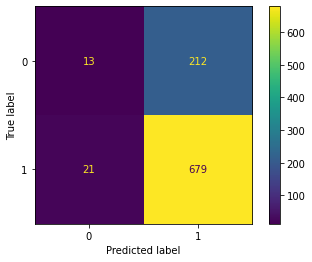

In [149]:
# build a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

# see 
cm = confusion_matrix(actual, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()
